# Week 4 Discussion

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [5]:
np_df = pd.read_csv('data/nps.csv')
np_df.head()

,ParkCode,ParkName,CategoryName,Order,Family,TaxonRecordStatus,SciName,CommonNames,ParkAccepted,Sensitive,...,ParkTags,References,Observations,Vouchers,ExternalLinks,TEStatus,StateStatus,OzoneSensitiveStatus,GRank,SRank
0,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Alces alces,Moose,True,False,...,NaN,11,1,0,NaN,50,NaN,NaN,G5,ME: S5
1,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Odocoileus virginianus,"Northern White-tailed Deer, Virginia Deer, Whi...",True,False,...,NaN,20,0,0,NaN,50,NaN,NaN,G5,ME: S5
2,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis latrans,"Coyote, Eastern Coyote",True,False,...,NaN,8,1,0,NaN,SC,NaN,NaN,G5,ME: S5
3,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",True,False,...,NaN,2,0,0,NaN,E,NaN,NaN,G5,ME: SH
4,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",True,False,...,NaN,16,0,0,NaN,NaN,NaN,NaN,G5,ME: S5


In [7]:
for col in ['CategoryName', 'Order', 'Family', 'GRank', 'ParkName', 'Sensitive', 'Nativeness', 'Observations']:
    np_df[f"{col}_cat"] = np_df[col].astype('category').cat.codes

In [8]:
np_df.columns

Index(['ParkCode', 'ParkName', 'CategoryName', 'Order', 'Family',
       'TaxonRecordStatus', 'SciName', 'CommonNames', 'ParkAccepted',
       'Sensitive', 'RecordStatus', 'Occurrence', 'OccurrenceTags',
       'Nativeness', 'NativenessTags', 'Abundance', 'NPSTags', 'ParkTags',
       'References', 'Observations', 'Vouchers', 'ExternalLinks', 'TEStatus',
       'StateStatus', 'OzoneSensitiveStatus', 'GRank', 'SRank',
       'CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'ParkName_cat', 'Sensitive_cat', 'Nativeness_cat', 'Observations_cat'],
      dtype='object')

### Split and Scale Data

In [11]:
# Split data into X and y
X = np_df[['CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat', 'Sensitive_cat', 'Nativeness_cat', 'Observations_cat']]
y = np_df['ParkName_cat']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Initialize KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [15]:
# Accuracy score
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.556446335078534


In [16]:
# Visualize KNN results
def knn():

    k_values = [3, 5, 7, 9, 11]
    accuracies = []

    # Loop through the different k-values and fit a model/obtain accuracy
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)

        # Make prediction and calculate accuracy
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        print(f"K = {k} - Accuracy: {accuracy:.3f}")

    # Visualize the effect of k on accuracy
    plt.figure(figsize=(10,6))
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.title('KNN Effect of K on Model Accuracy')
    plt.grid(True)
    plt.show()

K = 3 - Accuracy: 0.553
K = 5 - Accuracy: 0.556
K = 7 - Accuracy: 0.555
K = 9 - Accuracy: 0.556
K = 11 - Accuracy: 0.555


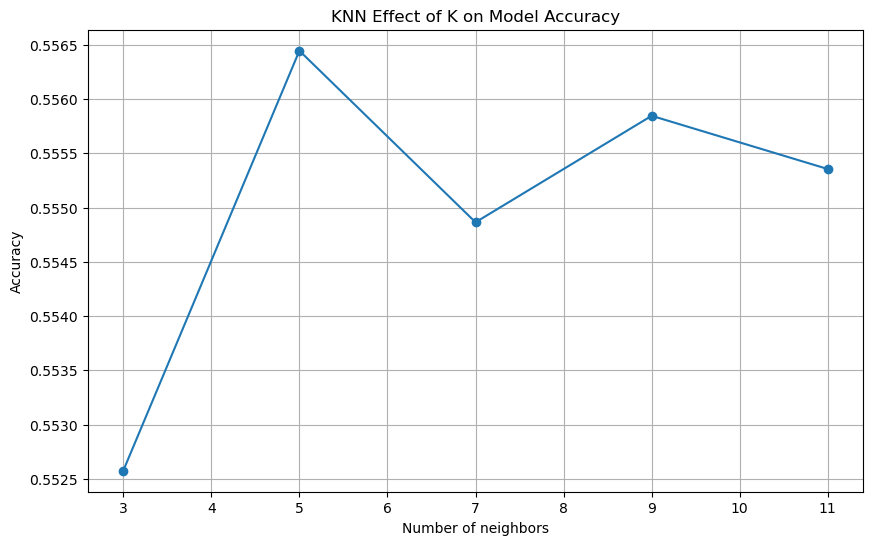

In [17]:
knn()

In [20]:
# Decision Tree
def decision_tree():
    # Different possible max depths
    max_depths = [2, 3, 4, 5]
    accuracies = []

    # Loop through the different k-values and fit a model/obtain accuracy
    for depth in max_depths:
        dt = DecisionTreeClassifier(max_depth=depth)
        dt.fit(X_train_scaled, y_train)

        # Make prediction and calculate accuracy
        y_pred = dt.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        print(f"Max_depth = {depth} - Accuracy: {accuracy:.3f}")

    # Visualize the effect of k on accuracy
    plt.figure(figsize=(10,6))
    plt.plot(max_depths, accuracies, marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Effect of Max Depth on Model Accuracy')
    plt.grid(True)
    plt.show()

Max_depth = 2 - Accuracy: 0.464
Max_depth = 3 - Accuracy: 0.497
Max_depth = 4 - Accuracy: 0.511
Max_depth = 5 - Accuracy: 0.531


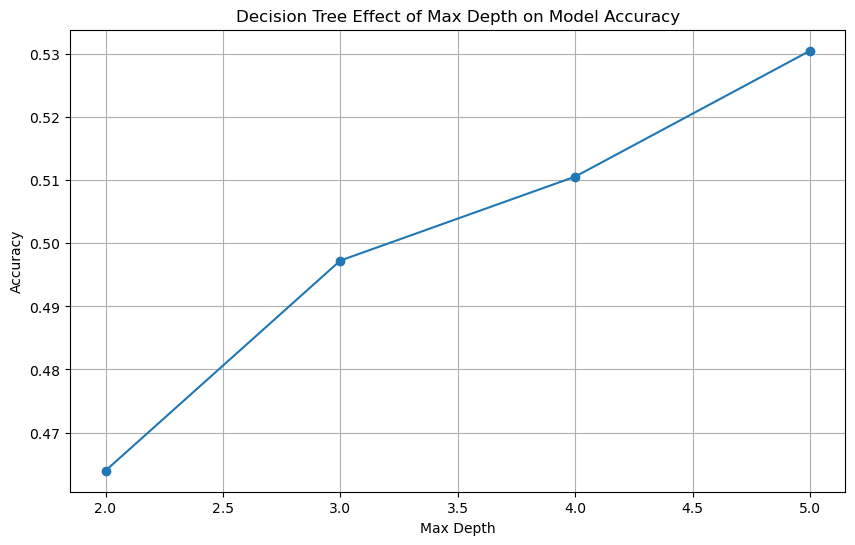

In [21]:
decision_tree()

In [22]:
# Visualize decision tree
dt_best = DecisionTreeClassifier(max_depth=5)
dt_best.fit(X_train_scaled, y_train)

# Create mapping from numeric classes to descriptive names
class_mapping = dict(zip(dt_best.classes_, np_df.ParkName.unique()))

# Convert class labels in dt.classes_ to strings using the mapping
class_names_str = [class_mapping[cls] for cls in dt_best.classes_]

# Plot decision tree
plt.figure(figsize=(12,15), dpi=700)
plot_tree(dt_best, feature_names=X.columns, class_names= class_names_str, filled = True, rounded = True)
plt.title('Decision Tree with Max Depth 5')
plt.savefig('decision_tree.png')
plt.show()


In [24]:
# Look more closely at node values
dt_best.tree_.value[2]

array([[ 996.,  901., 1352., 1728., 1806., 1193., 1809., 1144., 1715.,
         994.,  359., 1217., 1802., 1207., 1234.]])

In [26]:
# Feature importance
dt_best.feature_importances_
X.columns
# Make df of these two together

Index(['CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'Sensitive_cat', 'Nativeness_cat', 'Observations_cat'],
      dtype='object')